In [3]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set(rc={'figure.figsize': (9, 6)})

In [5]:
mushrooms = pd.read_csv('mushrooms.csv')

In [6]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
mushrooms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
mushrooms.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [9]:
mushrooms = mushrooms.rename(columns={'class' : 'cls'})

In [10]:
X = mushrooms.drop(['cls'], axis=1)
y = mushrooms.cls

In [11]:
y = np.where(y == 'p', 1, 0)

In [12]:
X = pd.get_dummies(X)

In [13]:
X

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.33, random_state=np.random.seed(0))

In [26]:
parameters = {'criterion' : ['entropy'],
              'n_estimators' : range(5, 25, 5),
              'max_depth' : range(1, 4),
              'min_samples_leaf' : range(2, 8),
              'min_samples_split' : range(2, 10, 2)}

In [27]:
clf_rf = RandomForestClassifier(random_state=0)

In [28]:
grid_search_cv = GridSearchCV(clf_rf, parameters, cv=3, verbose=1, n_jobs=-1)

In [29]:
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': range(1, 4),
                         'min_samples_leaf': range(2, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(5, 25, 5)},
             verbose=1)

In [30]:
grid_search_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 20}

In [31]:
best_clf_rf = grid_search_cv.best_estimator_

In [32]:
y_pred = best_clf_rf.predict(X_test)

In [33]:
precision_score(y_test, y_pred)

0.9786476868327402

In [37]:
recall_score(y_test, y_pred)

0.9493670886075949

In [34]:
imp = pd.DataFrame(best_clf_rf.feature_importances_, index=X_train.columns, columns=['importance'])

In [35]:
imp.sort_values('importance', ascending=False)

,importance
odor_f,0.118446
gill-color_b,0.112574
gill-size_n,0.100879
odor_n,0.091122
ring-type_l,0.090760
...,...
gill-color_n,0.000000
gill-color_k,0.000000
gill-color_h,0.000000
gill-color_g,0.000000


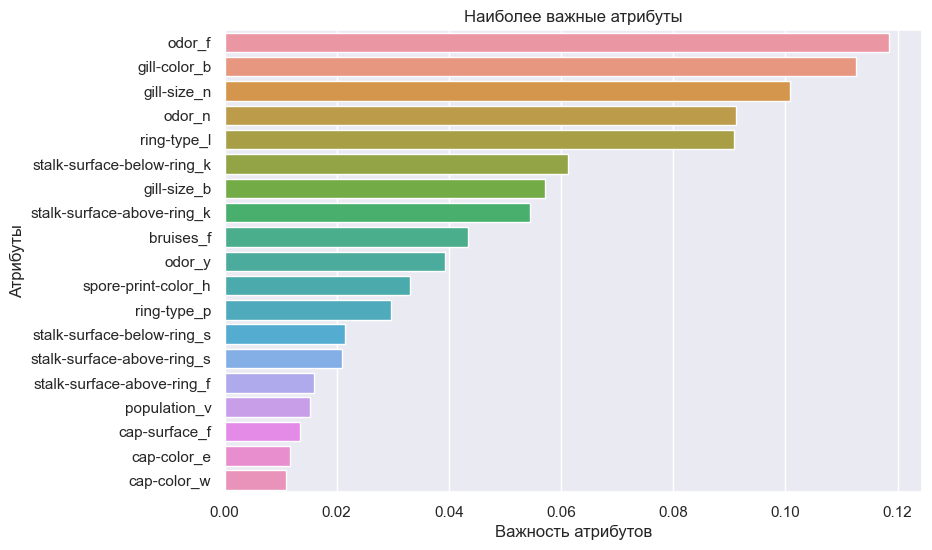

In [38]:
# Создадим атрибут feature_importances и сохраним его в отдельную переменную.
feature_importances = best_clf_rf.feature_importances_
# и сделаем DataFrame, одна колонка - имена переменных, другая - важность переменных, отсортированные по убыванию.
feature_importances_df = pd.DataFrame({'features': list(X_train), 'feature_importances': feature_importances}) \
    .sort_values(by='feature_importances', ascending=False).head(19)

# Построение графика.
f, ax = plt.subplots()
sns.barplot(y=feature_importances_df.features, x=feature_importances_df.feature_importances)
plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title('Наиболее важные атрибуты')
plt.show()

In [39]:
y_predicted_prob = best_clf_rf.predict_proba(X_test)

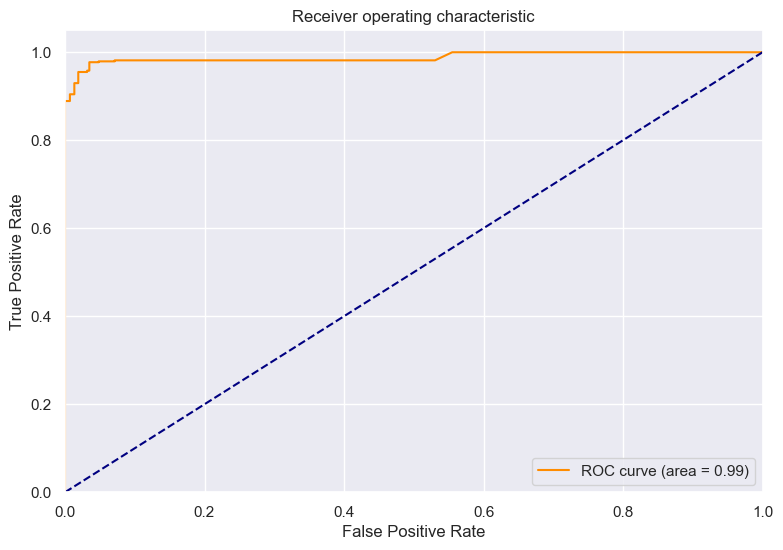

In [40]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()